In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import warnings
warnings.filterwarnings('ignore')

# Set the style for matplotlib
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Fix the path issue by using absolute path
base_path = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
features_path = os.path.join(base_path, "processed_data", "features.csv")

# Load the dataset
print("Loading dataset...")
features_df = pd.read_csv(features_path)
print(f"Dataset loaded with {features_df.shape[0]} rows and {features_df.shape[1]} columns")

# Display the first few rows of the dataset
features_df.head()

Loading dataset...
Dataset loaded with 982 rows and 4 columns


,filename,label,mean_distance,std_dev
0,gesture_0_20250521_040949_916399.jpg,0,22.600772,10.514087
1,gesture_0_20250521_040950_687812.jpg,0,27.149227,14.057058
2,gesture_0_20250521_040950_945610.jpg,0,27.343797,14.157616
3,gesture_0_20250521_040951_184655.jpg,0,27.389480,14.230114
4,gesture_0_20250521_040951_586583.jpg,0,26.368585,14.016286


Dataset Information:
Number of samples: 982
Number of features: 4

Missing values:
filename         0
label            0
mean_distance    0
std_dev          0
dtype: int64

Summary statistics:
            label  mean_distance     std_dev
count  982.000000     982.000000  982.000000
mean     2.502037      24.108965    9.909501
std      1.695919       3.279998    1.764952
min      0.000000      20.130543    7.445932
25%      1.000000      21.894053    8.964487
50%      2.000000      22.825820    9.690105
75%      4.000000      25.622496    9.945691
max      5.000000      38.755922   17.067468

Number of samples per gesture class:
label
0    157
1    163
2    180
3    160
4    156
5    166
Name: count, dtype: int64


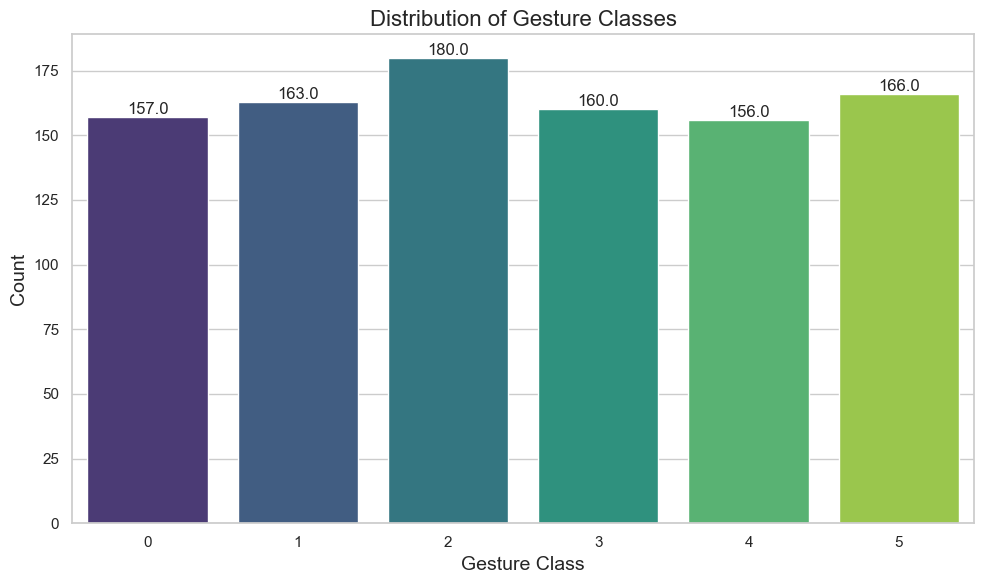

In [9]:
# Exploratory Data Analysis
print("Dataset Information:")
print(f"Number of samples: {features_df.shape[0]}")
print(f"Number of features: {features_df.shape[1]}")

# Check for missing values
print("\nMissing values:")
print(features_df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(features_df.describe())

# Count the number of samples per gesture class
gesture_counts = features_df['label'].value_counts().sort_index()
print("\nNumber of samples per gesture class:")
print(gesture_counts)

# Create a bar chart for the class distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='label', data=features_df, palette='viridis')
plt.title('Distribution of Gesture Classes', fontsize=16)
plt.xlabel('Gesture Class', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                fontsize=12)

plt.tight_layout()
plt.show()

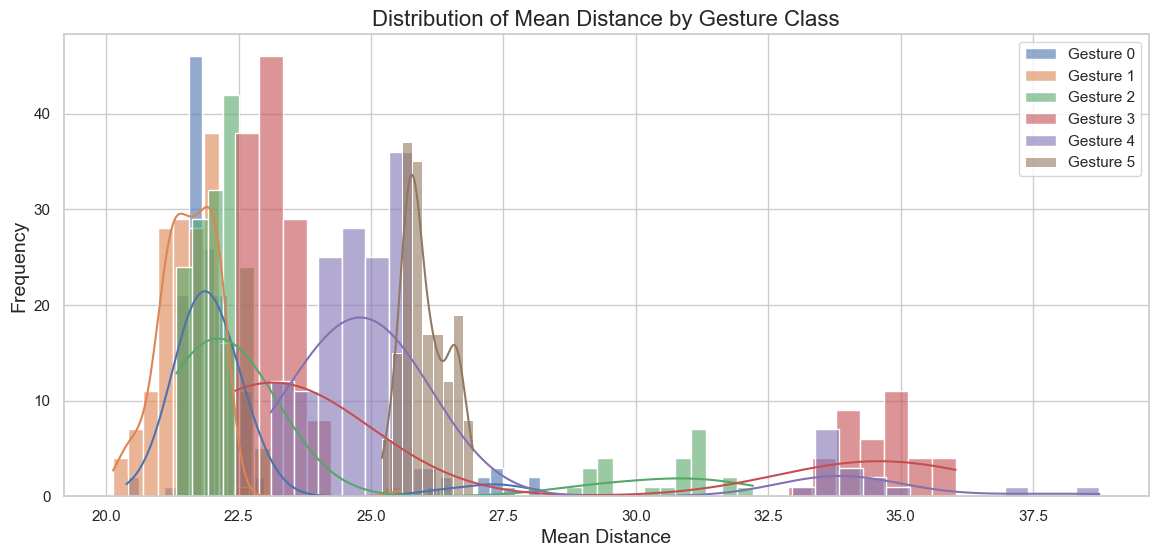

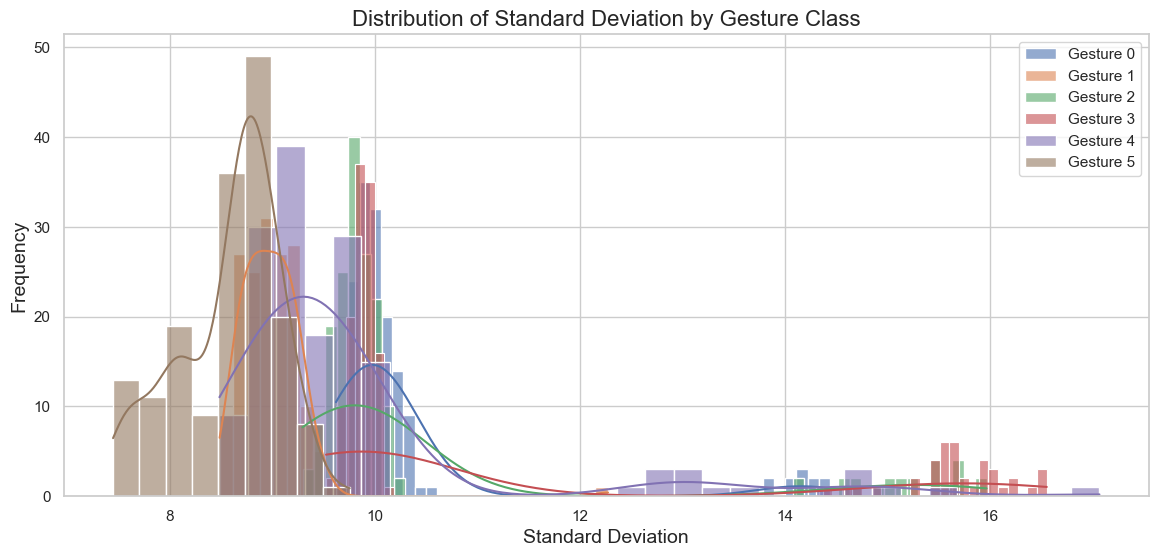

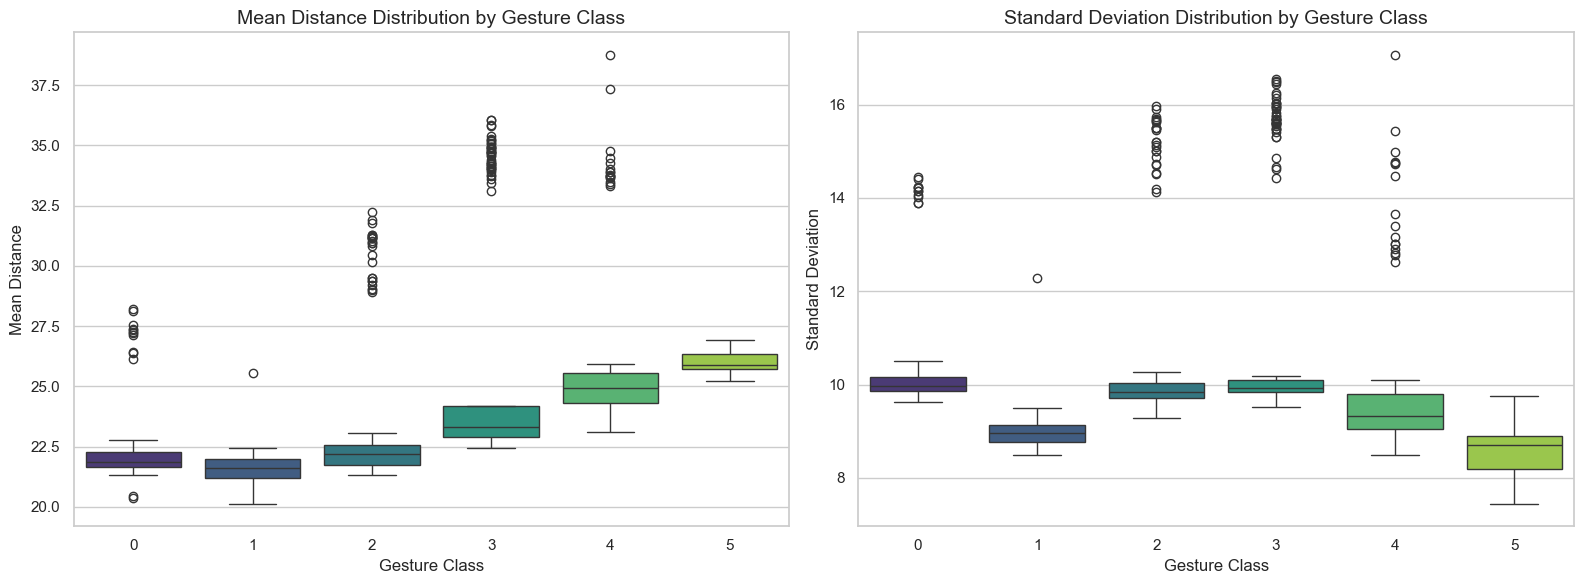

In [10]:
# Visualize Feature Distributions by Gesture

# Create histograms for mean_distance feature by gesture class
plt.figure(figsize=(14, 6))
for label in sorted(features_df['label'].unique()):
    sns.histplot(features_df[features_df['label'] == label]['mean_distance'], 
                 label=f'Gesture {label}', 
                 kde=True, 
                 alpha=0.6)

plt.title('Distribution of Mean Distance by Gesture Class', fontsize=16)
plt.xlabel('Mean Distance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

# Create histograms for std_dev feature by gesture class
plt.figure(figsize=(14, 6))
for label in sorted(features_df['label'].unique()):
    sns.histplot(features_df[features_df['label'] == label]['std_dev'], 
                 label=f'Gesture {label}', 
                 kde=True, 
                 alpha=0.6)

plt.title('Distribution of Standard Deviation by Gesture Class', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

# Create box plots for each feature by gesture class
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot for mean_distance
sns.boxplot(x='label', y='mean_distance', data=features_df, palette='viridis', ax=axes[0])
axes[0].set_title('Mean Distance Distribution by Gesture Class', fontsize=14)
axes[0].set_xlabel('Gesture Class', fontsize=12)
axes[0].set_ylabel('Mean Distance', fontsize=12)

# Box plot for std_dev
sns.boxplot(x='label', y='std_dev', data=features_df, palette='viridis', ax=axes[1])
axes[1].set_title('Standard Deviation Distribution by Gesture Class', fontsize=14)
axes[1].set_xlabel('Gesture Class', fontsize=12)
axes[1].set_ylabel('Standard Deviation', fontsize=12)

plt.tight_layout()
plt.show()

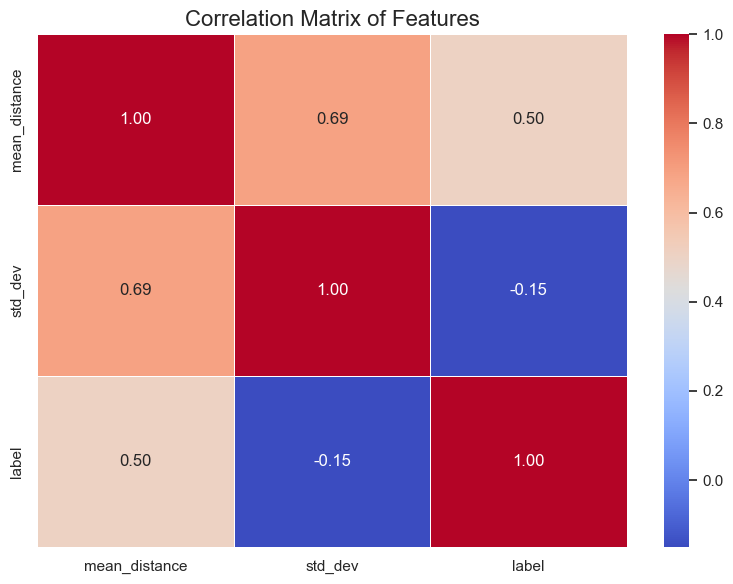

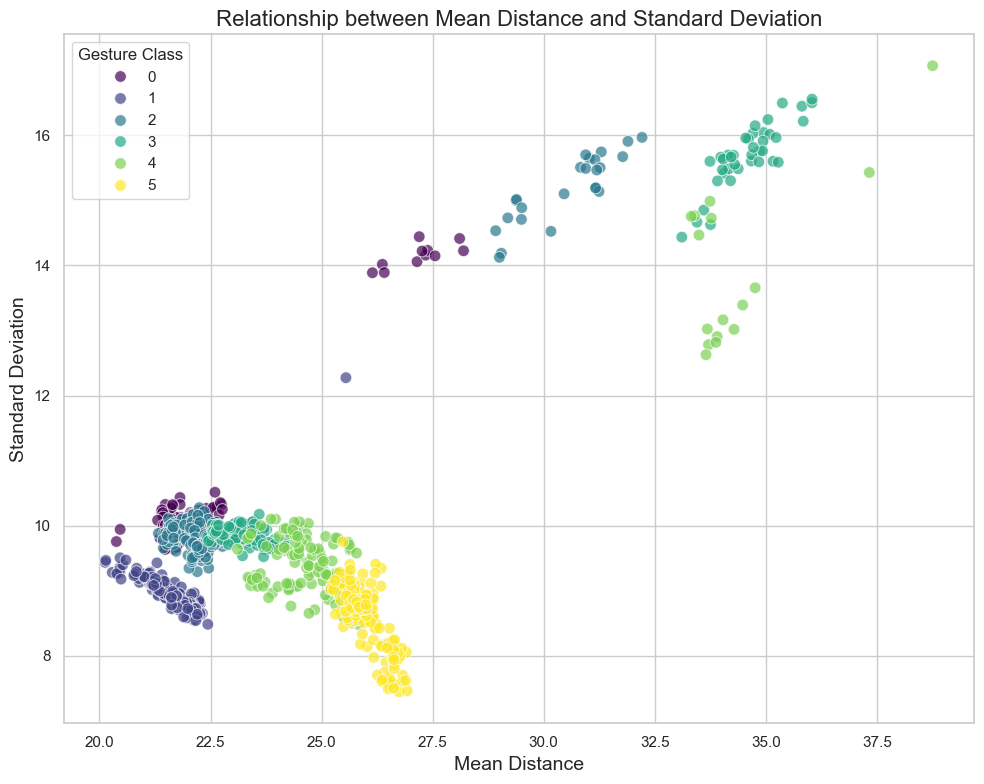

In [11]:
# Correlation Analysis

# Calculate correlation matrix
numeric_features = features_df[['mean_distance', 'std_dev', 'label']]
correlation_matrix = numeric_features.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Features', fontsize=16)
plt.tight_layout()
plt.show()

# Scatter plot of mean_distance vs std_dev colored by gesture class
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='mean_distance', y='std_dev', hue='label', 
                          data=features_df, palette='viridis', s=70, alpha=0.7)
plt.title('Relationship between Mean Distance and Standard Deviation', fontsize=16)
plt.xlabel('Mean Distance', fontsize=14)
plt.ylabel('Standard Deviation', fontsize=14)
plt.legend(title='Gesture Class')
plt.tight_layout()
plt.show()

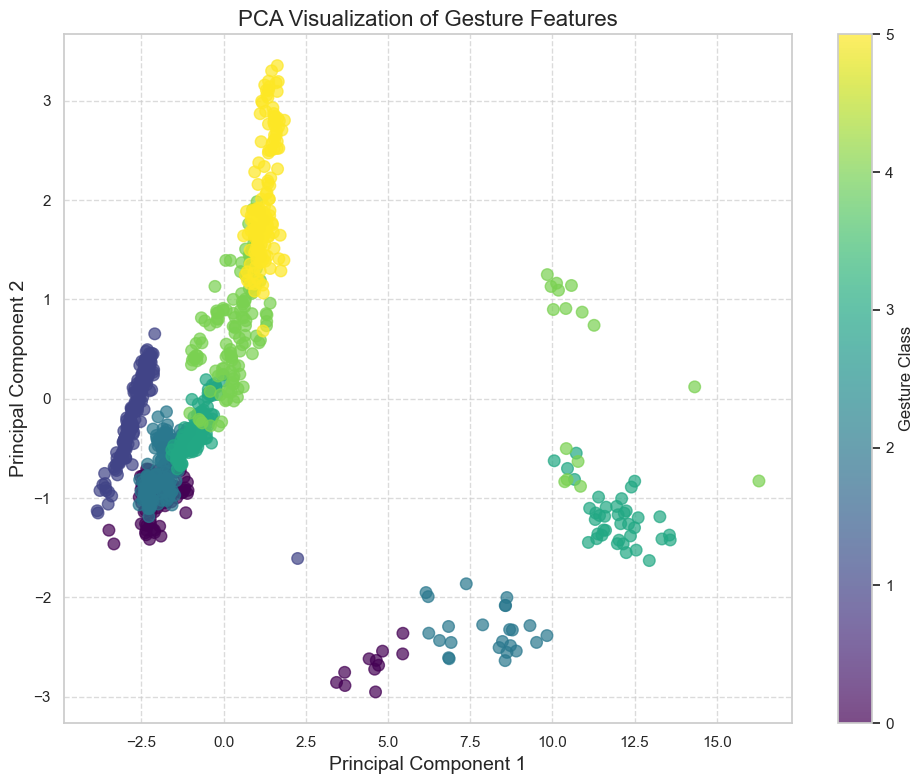

Explained variance ratio: [0.89845533 0.10154467]


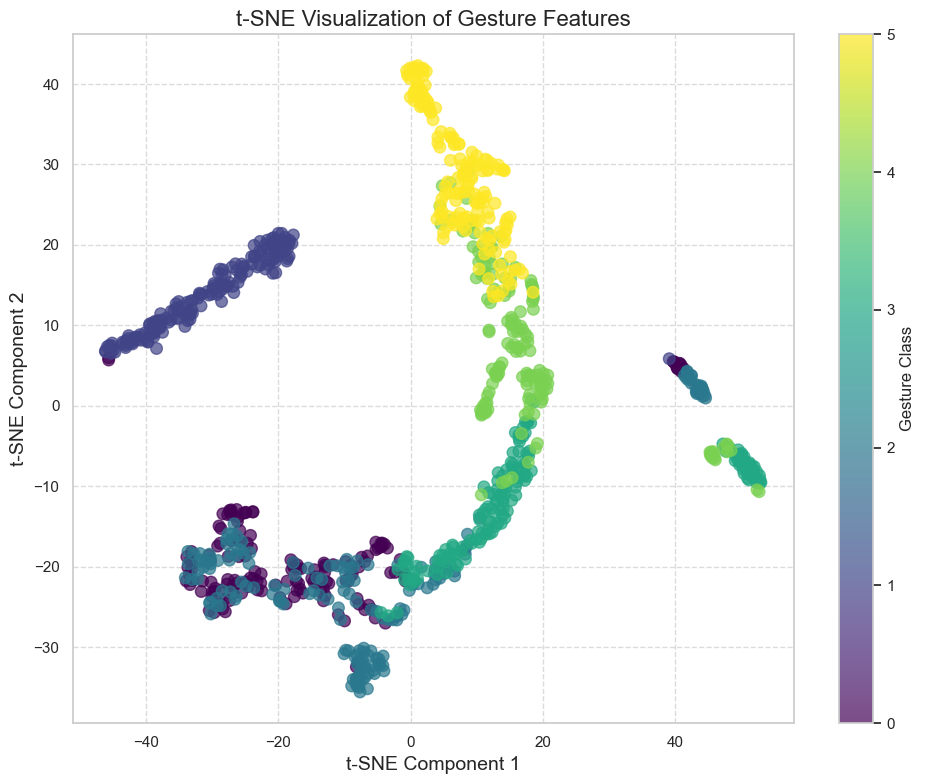

In [12]:
# Feature Space Visualization

# Prepare the feature matrix
X = features_df[['mean_distance', 'std_dev']].values
y = features_df['label'].values

# PCA visualization (mainly for demonstration since we only have 2 features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=70, alpha=0.7)
plt.colorbar(scatter, label='Gesture Class')
plt.title('PCA Visualization of Gesture Features', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# If there are multiple gesture classes, try t-SNE visualization
if len(features_df['label'].unique()) > 1:
    # t-SNE for visualization
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=70, alpha=0.7)
    plt.colorbar(scatter, label='Gesture Class')
    plt.title('t-SNE Visualization of Gesture Features', fontsize=16)
    plt.xlabel('t-SNE Component 1', fontsize=14)
    plt.ylabel('t-SNE Component 2', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [13]:
# Interactive Visualization Dashboard using Plotly

# Interactive scatter plot
fig_scatter = px.scatter(features_df, x='mean_distance', y='std_dev', color='label',
                         title='Interactive Scatter Plot of Gesture Features',
                         labels={'mean_distance': 'Mean Distance', 
                                'std_dev': 'Standard Deviation',
                                'label': 'Gesture Class'},
                         hover_data=['filename'],
                         color_continuous_scale='viridis')

fig_scatter.update_layout(
    width=900,
    height=600,
    template='plotly_white'
)

fig_scatter.show()

# Interactive histogram for mean_distance
fig_hist_mean = px.histogram(features_df, x='mean_distance', color='label', 
                             marginal='rug', opacity=0.7,
                             title='Distribution of Mean Distance by Gesture Class',
                             labels={'mean_distance': 'Mean Distance', 
                                    'label': 'Gesture Class'})

fig_hist_mean.update_layout(
    width=900,
    height=500,
    template='plotly_white',
    barmode='overlay'
)

fig_hist_mean.show()

# Interactive histogram for std_dev
fig_hist_std = px.histogram(features_df, x='std_dev', color='label', 
                           marginal='rug', opacity=0.7,
                           title='Distribution of Standard Deviation by Gesture Class',
                           labels={'std_dev': 'Standard Deviation', 
                                  'label': 'Gesture Class'})

fig_hist_std.update_layout(
    width=900,
    height=500,
    template='plotly_white',
    barmode='overlay'
)

fig_hist_std.show()

# Summary of key findings
print("\nSummary of Key Findings:")
print("1. Feature distributions and their relationship with gesture classes")
print("2. Correlation between features")
print("3. Visual separability of classes in the feature space")


Summary of Key Findings:
1. Feature distributions and their relationship with gesture classes
2. Correlation between features
3. Visual separability of classes in the feature space


In [ ]:
# SVM Implementation in Julia using SMO Algorithm
using Random

# Helper functions for SVM implementation
function rbf_kernel(x1, x2, gamma)
    return exp(-gamma * sum((x1 - x2).^2))
end

function compute_kernel_matrix(X, gamma)
    n = size(X, 1)
    K = zeros(n, n)
    for i in 1:n
        for j in 1:n
            K[i, j] = rbf_kernel(X[i, :], X[j, :], gamma)
        end
    end
    return K
end

# Manual implementation of SVM with SMO algorithm
mutable struct SVMModel
    X::Array{Float64,2}
    y::Array{Int64,1}
    alphas::Array{Float64,1}
    b::Float64
    C::Float64
    gamma::Float64
    support_vectors::Array{Int64,1}
end

function train_svm(X, y, C, gamma, max_iter=1000, tol=1e-3)
    n = size(X, 1)
    alphas = zeros(n)
    b = 0.0
    
    # Precompute kernel matrix
    K = compute_kernel_matrix(X, gamma)
    
    # Simplified SMO algorithm
    iter = 0
    while iter < max_iter
        alpha_changed = false
        
        for i in 1:n
            Ei = sum([alphas[j] * y[j] * K[i, j] for j in 1:n]) + b - y[i]
            
            if (y[i] * Ei < -tol && alphas[i] < C) || (y[i] * Ei > tol && alphas[i] > 0)
                # Select j randomly
                j = rand([k for k in 1:n if k != i])
                
                Ej = sum([alphas[k] * y[k] * K[j, k] for k in 1:n]) + b - y[j]
                
                # Save old alphas
                alpha_i_old = alphas[i]
                alpha_j_old = alphas[j]
                
                # Compute bounds
                if y[i] != y[j]
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else
                    L = max(0, alphas[i] + alphas[j] - C)
                    H = min(C, alphas[i] + alphas[j])
                end
                
                if abs(L - H) < 1e-4
                    continue
                end
                
                eta = 2 * K[i, j] - K[i, i] - K[j, j]
                
                if eta >= 0
                    continue
                end
                
                # Update alpha j
                alphas[j] = alphas[j] - (y[j] * (Ei - Ej)) / eta
                
                # Clip alpha j
                alphas[j] = min(H, max(L, alphas[j]))
                
                if abs(alphas[j] - alpha_j_old) < 1e-5
                    continue
                end
                
                # Update alpha i
                alphas[i] = alphas[i] + y[i] * y[j] * (alpha_j_old - alphas[j])
                
                # Update b
                b1 = b - Ei - y[i] * (alphas[i] - alpha_i_old) * K[i, i] - y[j] * (alphas[j] - alpha_j_old) * K[i, j]
                b2 = b - Ej - y[i] * (alphas[i] - alpha_i_old) * K[i, j] - y[j] * (alphas[j] - alpha_j_old) * K[j, j]
                
                if 0 < alphas[i] < C
                    b = b1
                elseif 0 < alphas[j] < C
                    b = b2
                else
                    b = (b1 + b2) / 2
                end
                
                alpha_changed = true
            end
        end
        
        if !alpha_changed
            iter += 1
        else
            iter = 0
        end
    end
    
    # Find support vectors
    support_vectors = findall(alphas .> 1e-5)
    
    return SVMModel(X, y, alphas, b, C, gamma, support_vectors)
end

function predict_point(model, x)
    result = 0.0
    for i in model.support_vectors
        result += model.alphas[i] * model.y[i] * rbf_kernel(model.X[i, :], x, model.gamma)
    end
    result += model.b
    return sign(result)
end

function predict(model, X_test)
    n_test = size(X_test, 1)
    predictions = zeros(Int64, n_test)
    
    for i in 1:n_test
        predictions[i] = predict_point(model, X_test[i, :])
    end
    
    return predictions
end

# Data preparation
X = hcat(features_df.mean_distance, features_df.std_dev)
y_original = features_df.label
# Convert labels to -1, 1 for binary classification or maintain multiclass for one-vs-rest
y = copy(y_original)

# Train-test split (with stratification)
function train_test_split(X, y, test_size=0.2, seed=42)
    Random.seed!(seed)
    n = size(X, 1)
    indices = collect(1:n)
    
    # Stratify by class
    classes = unique(y)
    train_idx = Int[]
    test_idx = Int[]
    
    for c in classes
        class_indices = findall(y .== c)
        n_class = length(class_indices)
        n_test = round(Int, test_size * n_class)
        
        # Shuffle indices for this class
        shuffle!(class_indices)
        
        # Split into train and test
        append!(test_idx, class_indices[1:n_test])
        append!(train_idx, class_indices[(n_test+1):end])
    end
    
    return X[train_idx, :], X[test_idx, :], y[train_idx], y[test_idx]
end

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2, 42)

# Standardize features
function standardize(X_train, X_test)
    n_features = size(X_train, 2)
    means = [mean(X_train[:, j]) for j in 1:n_features]
    stds = [std(X_train[:, j]) for j in 1:n_features]
    
    X_train_scaled = copy(X_train)
    X_test_scaled = copy(X_test)
    
    for j in 1:n_features
        X_train_scaled[:, j] = (X_train[:, j] .- means[j]) ./ stds[j]
        X_test_scaled[:, j] = (X_test[:, j] .- means[j]) ./ stds[j]
    end
    
    return X_train_scaled, X_test_scaled, means, stds
end

X_train_scaled, X_test_scaled, means, stds = standardize(X_train, X_test)

# Train SVM model (one-vs-rest for multiclass)
println("Training SVM model...")

# For multiclass, we'll train one SVM per class
models = Dict()
C = 10.0
gamma = 0.1  # equivalent to 'scale' in sklearn

for class in unique(y)
    # Create binary labels for current class
    binary_y_train = [y_i == class ? 1 : -1 for y_i in y_train]
    
    # Train model for this class
    models[class] = train_svm(X_train_scaled, binary_y_train, C, gamma)
    println("Trained model for class $class")
end

# Make predictions (select class with highest decision value)
function predict_multiclass(models, X)
    n = size(X, 1)
    predictions = zeros(Int, n)
    
    for i in 1:n
        best_score = -Inf
        best_class = first(keys(models))
        
        for (class, model) in models
            # Get raw decision value before sign
            decision_value = 0.0
            for j in model.support_vectors
                decision_value += model.alphas[j] * (model.y[j] == 1 ? 1 : -1) * 
                                  rbf_kernel(model.X[j, :], X[i, :], model.gamma)
            end
            decision_value += model.b
            
            if decision_value > best_score
                best_score = decision_value
                best_class = class
            end
        end
        
        predictions[i] = best_class
    end
    
    return predictions
end

# Make predictions
y_pred = predict_multiclass(models, X_test_scaled)

# Evaluate accuracy
function accuracy(y_true, y_pred)
    return sum(y_true .== y_pred) / length(y_true)
end

println("\nModel Evaluation:")
println("Accuracy: ", round(accuracy(y_test, y_pred), digits=4))

println("\nSVM model training and evaluation complete.")